<a href="https://colab.research.google.com/github/PedrolyraC/electromechanical-conversion/blob/main/electromechanical_conversion_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import pandas as pd

In [2]:
def calculate_a_and_b_geometric_section(geometric_section: float):
    if geometric_section > 25:
        a = 5
    else:
        a = 4
    b = geometric_section/a
    return b

In [3]:
def core_geometric_section_1(magnetic_section: float):
    return magnetic_section*1.1

In [4]:
def core_magnetic_section(length: float, width: float)->float:
    return core_geometric_section(length, width)/1.1

In [5]:
def core_geometric_section(length: float, width: float)->float:
    return length*width

In [6]:
def core_magnetic_section1(length: float, width: float)->float:
    return 1.1*core_geometric_section(length, width)

In [7]:
def cooper_section(n1:float,s1:float,n2:float,s2:float):
    return n1*s1 + n2*s2

In [8]:
def blades_qtd(b:float,acesita:float):
  return round((b*0.9)/acesita)

In [9]:
def dimensions_core(a:float,b:float,second_potency:float):
    if(second_potency>800):
        largura=3*a
        altura=4*a
        comprimento=b
        seção_janela=(0.5*a*3*a)*100  ## mm²
        volume= ((largura*altura) - (0.5*a*3*a*2))*b*0.9 ## cm³


        return ("\nA Largura é: "+str(largura)+"cm\n" +
                "A Altura é: "+str(altura)+"cm\n" +
                "O Comprimento é: "+str(comprimento)+"cm\n" +
                "A Seção da janela é: "+str(seção_janela)+"mm²\n"+
                "O Volume é: "+str(volume)+"cm³")

    else:
     print("mero")


In [10]:
def bitola_which(condutor_section:float):
    mero = []

    if(condutor_section<=53.476 and condutor_section>42.409):
        mero.append(53.476)
        mero.append("fio 0")
        return mero
    if(condutor_section<=42.409 and condutor_section>33.362):
        mero.append(42.409)
        mero.append("fio 1")
        return  mero
    if(condutor_section<=33.362 and condutor_section>26.271):
        mero.append(33.362)
        mero.append("fio 2")
        return mero
    if(condutor_section<=26.271 and condutor_section>21.152):
        mero.append(26.271)
        mero.append("fio 3")
        return  mero
    if(condutor_section<21.152 and condutor_section>16.774):
        mero.append(21.152)
        mero.append("fio 4")
        return mero
    if(condutor_section<16.774 and condutor_section>13.303):
        mero.append(16.774)
        mero.append("fio 5")
        return  mero
    if(condutor_section<13.303 and condutor_section>10.549):
        mero.append(13.303)
        mero.append("fio 6")
        return mero
    if(condutor_section<10.549 and condutor_section>8.366):
        mero.append(10.549)
        mero.append("fio 7")
        return  mero
    if(condutor_section<8.366 and condutor_section>6.635):
        mero.append(8.366)
        mero.append("fio 8")
        return mero
    if(condutor_section<6.635 and condutor_section>5.262):
        mero.append(6.635)
        mero.append("fio 9")
        return  mero
    if(condutor_section<5.262 and condutor_section>4.173):
        mero.append(5.262)
        mero.append("fio 10")
        return mero
    if(condutor_section<4.173 and condutor_section>3.309):
        mero.append(4.173)
        mero.append("fio 11")
        return  mero
    if(condutor_section<3.309 and condutor_section>2.624):
        mero.append(3.309)
        mero.append("fio 12")
        return mero
    if(condutor_section<2.624 and condutor_section>2.081):
        mero.append(2.624)
        mero.append("fio 13")
        return  mero
    if(condutor_section<2.081 and condutor_section>1.650):
        mero.append(2.081)
        mero.append("fio 14")
        return mero
    if(condutor_section<1.650 and condutor_section>1.309):
        mero.append(1.650)
        mero.append("fio 15")
        return  mero
    if(condutor_section<1.309 and condutor_section>1.038):
        mero.append(1.309)
        mero.append("fio 16")
        return mero
    if(condutor_section<1.038 and condutor_section>0.823):
        mero.append(1.038)
        mero.append("fio 17")
        return  mero
    if(condutor_section<0.823 and condutor_section>0.653):
        mero.append(0.823)
        mero.append("fio 18")
        return  mero
    if(condutor_section<0.653 and condutor_section>0.518):
        mero.append(0.653)
        mero.append("fio 19")
        return  mero
    if(condutor_section<0.518 and condutor_section>0.411):
        mero.append(0.518)
        mero.append("fio 20")
        return  mero

In [11]:
def conductor_section(current, potency)->float:
    if potency == 500:
        return current/3
    if potency >= 500 and potency <= 1000:
        return current/2.5
    if potency >= 1000 and potency <= 3000:
        return current/2

    return 'Invalid value'

In [12]:
def iron_core_weight(geometric_section:float):
    b = calculate_a_and_b_geometric_section(geometric_section)

    if(geometric_section>25):
        return 1.580*b
    return 1.000*b

In [13]:
def calculate_lm(core_gs):
    b = calculate_a_and_b_geometric_section(core_gs)

    if(core_gs>25):
        return (2*5 + 2*b + 0.5*3.14*5)
    return (2*4 + 2*b + 0.5*3.14*4)

In [14]:
def cooper_weight(section_cooper:float, lm:float):
    return ((section_cooper/100)*lm*9)*0.001

In [15]:
def copper_core_weight(
    first_tension: float,
    second_tension: float,
    first_potency: float,
    second_potency: float,
    frequency: float,
    first_current: float,
    second_current: float,
    is_long_cable,
    is_two_primary_circuits: bool=False,
    is_two_secondary_circuits: bool=False
    )->float:
    geometric_section = calculate_magnectic_section_core(second_potency, frequency, is_long_cable, is_two_primary_circuits, is_two_secondary_circuits)
    aux = geometric_section
    a = round(math.sqrt(aux*1.1))
    b = geometric_section/a
    average_length = 2*a + 2*b + 0.5*a*math.pi
    s1 = conductor_section(first_current, first_potency)
    s2 = conductor_section(second_current, second_potency)
    n1 = first_tension*1.1
    n2 = second_tension*1.1
    section_copper = n1*s1 + n2*s2

    return (section_copper/100)*average_length*9

In [16]:
def calculate_turns_number_1(frequency: float, tension: float, core_ms: float):
    if(frequency == 50):
        return tension*(40/core_ms)
    return tension*(33.5/core_ms)

In [17]:
def exec_possibility_1(n1:float, n2:float, s1:float, s2: float,geometric_section:float):
    possibility=2400/cooper_section(n1,s1,n2,s2)

    if(geometric_section >25):
        possibility= 3750/cooper_section(n1,s1,n2,s2)
        return (f'Possible to project the transformer. Coeficient: {possibility}' if(possibility>=3)
                else f'Impossible to project this transformer. Please, reproject the transformer with a bigger core. Coeficient:{possibility}')
    return (f'Possible to project the transformer. Coeficient: {possibility}' if(possibility>=3)
            else f'Impossible to project this transformer. Please, reproject the transformer with a bigger core. Coeficient:{possibility}')

In [18]:
def calculate_turns_number(
    tension:float,
    sm:float,
    frequency:float,
    bm:float = 11300
    )->float:
    return (tension/sm)*(1e8/(4.44*bm*frequency))

In [19]:
def calculate_magnectic_section_core(
    potency: float,
    frequency: float,
    is_long_cable: bool,
    is_two_primary_circuits: bool=False,
    is_two_secondary_circuits: bool=False
    )->float:
    standard_cables = 7.5*(math.sqrt(potency/frequency))
    long_cables = 6.5*(math.sqrt(potency/frequency))

    if is_two_primary_circuits is False and is_two_secondary_circuits is False:
        if is_long_cable:
            return long_cables
        return standard_cables

    if is_two_primary_circuits is True and is_two_secondary_circuits is False:
        standard_cables = 7.5*(math.sqrt(1.25*potency/frequency))
        long_cables = 6*(math.sqrt(1.25*potency/frequency))

        if is_long_cable:
            return long_cables
        return standard_cables

    if is_two_primary_circuits is True and is_two_secondary_circuits is True:
        standard_cables = 7.5*(math.sqrt(1.5*potency/frequency))
        long_cables = 6*(math.sqrt(1.5*potency/frequency))

        if is_long_cable:
            return long_cables
        return standard_cables

    print('Invalid option')
    return [0, 0]

# **3D TRANSFORMER MODELING**

In [20]:
def rotate_transformer(vertices, angle):
    rotation_matrix = np.array([
        [ np.cos(angle), 1,0],
        [0,-np.cos(angle),1],
        [ np.sin(angle), np.cos(angle),0]
    ])
    return np.dot(vertices, rotation_matrix.T)

In [21]:
def create_transformer_sections(x, y, z, dx, dy, dz):
    return np.array([[x, y, z],
                     [x + dx, y, z],
                     [x + dx, y + dy, z],
                     [x, y + dy, z],
                     [x, y, z + dz],
                     [x + dx, y, z + dz],
                     [x + dx, y + dy, z + dz],
                     [x, y + dy, z + dz]])

In [22]:
def plot_transformer(ax, vertices, c):
    faces = [[vertices[j] for j in [0, 1, 5, 4]],
             [vertices[j] for j in [7, 6, 2, 3]],
             [vertices[j] for j in [0, 3, 7, 4]],
             [vertices[j] for j in [1, 2, 6, 5]],
             [vertices[j] for j in [0, 1, 2, 3]],
             [vertices[j] for j in [4, 5, 6, 7]]]

    poly3d = Poly3DCollection(faces, linewidths=1, alpha=.35, color=c)
    ax.add_collection3d(poly3d)

In [23]:
def generate_transformer(ax, angle:float,a:float):
    primario = True
    secundario = True

    parts = [                     # X, Y, Z, H, W, T
        create_transformer_sections(0, 0, 0, 0.5*a, 3*a, 1),  # base da lamina "E"
        create_transformer_sections(0, a+1.5*a, 0, 2*a, a*0.5, 1),  # seção do secundario
        create_transformer_sections(0, a, 0, 2*a, a, 1),  # tronco central do transformador
        create_transformer_sections(0, 0, 0, 2*a, a*0.5, 1),  # seção do primario
        create_transformer_sections(2*a, 0, 0, 0.5*a, 3*a, 1)   # Seção que compõe a lamina tipo "I" (topo do transformador)
    ]
    cont = 0
    for part in parts:
        c = 'gray'
        if cont == 1 or cont == 3:
            c = "C" + str(cont) #C1 = Laranja, C2 = Vermelho
        cont += 1
        rotated_part = rotate_transformer(part, angle)
        plot_transformer(ax, rotated_part, c) # plotar transformador rotacionado
    #espira primaria
    if(primario):
        zline = np.linspace(0.5*a, 2*a, 100)
        xline = np.cos(zline*3*a)
        yline = np.sin(zline*3*a)
        ax.plot3D((a/2)*xline+(a*0.25), yline+0.5, zline, color='brown')

    #espira secundaria
    if(secundario):
        zline = np.linspace(a, 1.5*a, 100)
        xline = np.cos(zline*2*a)
        yline = np.sin(zline*2*a)
        ax.plot3D((a/2)*xline+(a*2.5+(a*0.25)), yline+0.5, zline, color='brown')

In [24]:
def meroshow (frequency: float, second_potency:float, first_tension: float, second_tension:float):

    acesita_blade_espessura= 0.035
    first_potency: float = second_potency*1.1
    first_current: float = first_potency/first_tension
    second_current: float = second_potency/second_tension
    bm:float = 11300

    s1 = conductor_section(first_current, second_potency)
    s2 = conductor_section(second_current, second_potency)
    s1_Bitola= bitola_which(s1)
    s2_Bitola= bitola_which(s2)

    magnetic_section = calculate_magnectic_section_core(first_potency, frequency, True)
    geometric_section = core_geometric_section_1(magnetic_section)

    if(second_potency>800):
        print("Uso das laminas Compridas Devido a potencia maior que 800VA")
    else:
        print("Uso das laminas padronizadas Devido a potencia menor que 800VA")

    if geometric_section > 25:
        a = 5
    else:
        a = 4


    b = round(calculate_a_and_b_geometric_section(geometric_section),1)

    core_gs = core_geometric_section(a, b)
    core_ms =round (core_magnetic_section(a, b),1)



    n1 = calculate_turns_number_1(frequency, first_tension, core_ms)
    n2 = calculate_turns_number_1(frequency,  second_tension, core_ms)*1.1
    possibility = exec_possibility_1(n1,n2,s1,s2,core_gs)
    iron_weight = iron_core_weight(core_gs)
    section_cooper= cooper_section(n1,s1,n2,s2)
    comprimento_medio_espiras_cobre = calculate_lm(core_gs)
    weight_cooper = cooper_weight(section_cooper,comprimento_medio_espiras_cobre)
    p = copper_core_weight( first_tension,second_tension,first_potency,second_potency,frequency,first_current,second_current,True)
    dimensions= dimensions_core(a,b,second_potency)
    qtd_blades= blades_qtd(b,acesita_blade_espessura)
    print("first_potency", first_potency)
    print("first_current", first_current)
    print("second_current", second_current)
    print("bm", bm)
    print("s1: ", s1)
    print("s2: ", s2)
    print("s1_Bitola: ", s1_Bitola)
    print("s2_Bitola: ", s2_Bitola)
    print("magnetic_section: ", magnetic_section)
    print("geometric_section: ", geometric_section)
    print("core_gs: ", core_gs)
    print("core_ms: ", core_ms)

    if(a==5):
        print("Uso das laminas Compridas Nº6 que possui a=5cm")
    else:
        print("Uso das laminas compridas Nº5 que possui a=4cm")
    print("n1: ", n1)
    print("n2: ", n2)
    print(possibility)
    print("iron_core_weight: ",iron_weight)
    print("cooper Section:", section_cooper, "mm²")
    print("Cooper Weight:", weight_cooper)
    print("Core DImensions: ",dimensions)
    print("Blades Quantity:",qtd_blades)


    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    angle = np.radians(90)

    generate_transformer(ax, angle,a)

    ax.set_xlim([0, 15])
    ax.set_ylim([0, 5])
    ax.set_zlim([0, 15])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()


In [25]:
def analyze_table(bitola_wire: float):
    database = pd.read_excel('awg.xlsx')
    database = database.sort_values('section').reset_index(drop=True)
    sections = database['section'].values
    idx = np.searchsorted(sections, bitola_wire, side='right')

    if idx < len(sections):
        nearest_awg = database.iloc[idx]['awg']
        return nearest_awg
    else:
        return database.iloc[-1]['awg']

Uso das laminas Compridas Devido a potencia maior que 800VA
first_potency 1100.0
first_current 5.0
second_current 41.666666666666664
bm 11300
s1:  2.0
s2:  16.666666666666664
s1_Bitola:  [2.081, 'fio 14']
s2_Bitola:  [16.774, 'fio 5']
magnetic_section:  30.487702438852292
geometric_section:  33.536472682737525
core_gs:  33.5
core_ms:  30.5
Uso das laminas Compridas Nº6 que possui a=5cm
n1:  288.5245901639344
n2:  34.622950819672134
Possible to project the transformer. Coeficient: 3.249289772727273
iron_core_weight:  10.586
cooper Section: 1154.0983606557377 mm²
Cooper Weight: 3.245901639344263
Core DImensions:  
A Largura é: 15cm
A Altura é: 20cm
O Comprimento é: 6.7cm
A Seção da janela é: 3750.0mm²
O Volume é: 1356.75cm³
Blades Quantity: 172


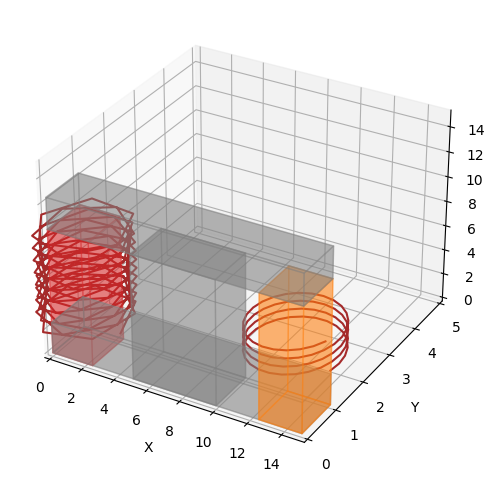

In [26]:
meroshow(50,1000,220,24)